# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

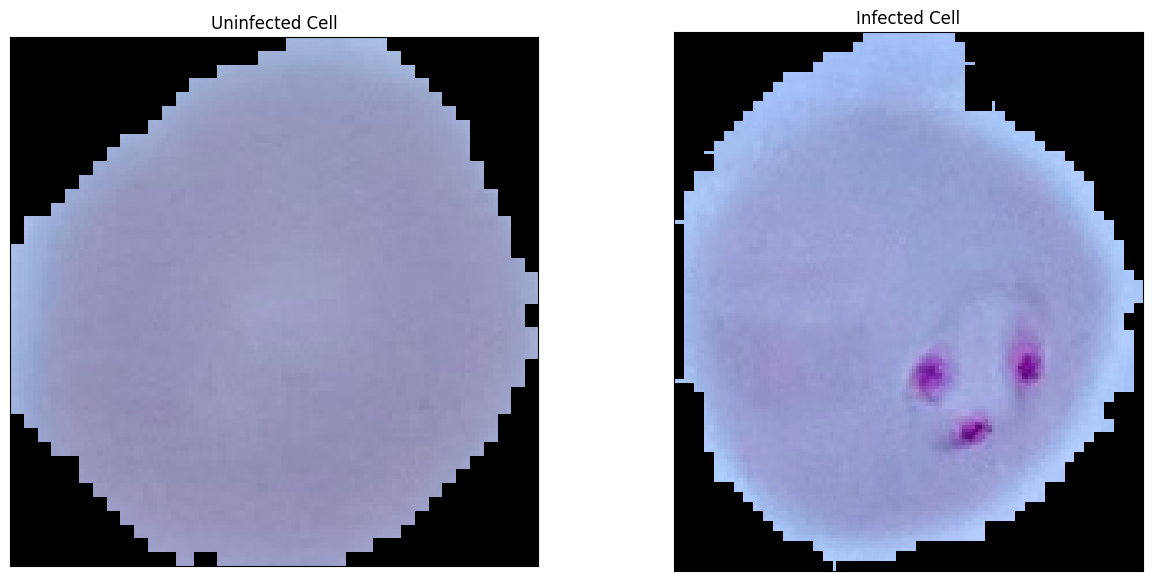

In [5]:
import cv2

upic='./cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='./cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [6]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [9]:
trainDatagen = datagen.flow_from_directory(directory='./cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [11]:
valDatagen = datagen.flow_from_directory(directory='./cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Preparing the model

In [12]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [17]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =40,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/40


/var/folders/0k/djpdv2s50w181dxt17y0x1m40000gn/T/ipykernel_26970/4122457707.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x63x63x16xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0

   4/1378 [..............................] - ETA: 30s - loss: 0.7647 - accuracy: 0.5469    

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x63x63x16xi1>'


1376/1378 [============================>.] - ETA: 0s - loss: 0.3504 - accuracy: 0.8611

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'


1378/1378 [==============================] - 36s 23ms/step - loss: 0.3502 - accuracy: 0.8612 - val_loss: 0.2020 - val_accuracy: 0.9261
Epoch 2/40
   7/1378 [..............................] - ETA: 24s - loss: 0.1183 - accuracy: 0.9464

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x6x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x6x1x1xi1>'


1378/1378 [==============================] - 30s 22ms/step - loss: 0.1735 - accuracy: 0.9434 - val_loss: 0.1705 - val_accuracy: 0.9403
Epoch 3/40
1378/1378 [==============================] - 31s 22ms/step - loss: 0.1453 - accuracy: 0.9539 - val_loss: 0.1638 - val_accuracy: 0.9456
Epoch 4/40
1378/1378 [==============================] - 31s 23ms/step - loss: 0.1360 - accuracy: 0.9555 - val_loss: 0.1636 - val_accuracy: 0.9430
Epoch 5/40
1378/1378 [==============================] - 30s 22ms/step - loss: 0.1342 - accuracy: 0.9583 - val_loss: 0.1747 - val_accuracy: 0.9450
Epoch 6/40
1378/1378 [==============================] - 30s 22ms/step - loss: 0.1285 - accuracy: 0.9579 - val_loss: 0.1636 - val_accuracy: 0.9446
Epoch 7/40
1378/1378 [==============================] - 31s 22ms/step - loss: 0.1228 - accuracy: 0.9605 - val_loss: 0.1625 - val_accuracy: 0.9448
Epoch 8/40
1378/1378 [==============================] - 30s 22ms/step - loss: 0.1167 - accuracy: 0.9614 - val_loss: 0.1644 - val_accura

In [22]:
model.save('./model.h5')

/Users/alfredonuada/miniconda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plots

In [28]:
def plotLearningCurve(history):
    # Extracting accuracy and loss data from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Determine the number of epochs
    epochs = range(1, len(accuracy) + 1)
    
    # Plotting accuracy
    plt.plot(epochs, accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.figure()
    
    # Plotting loss
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


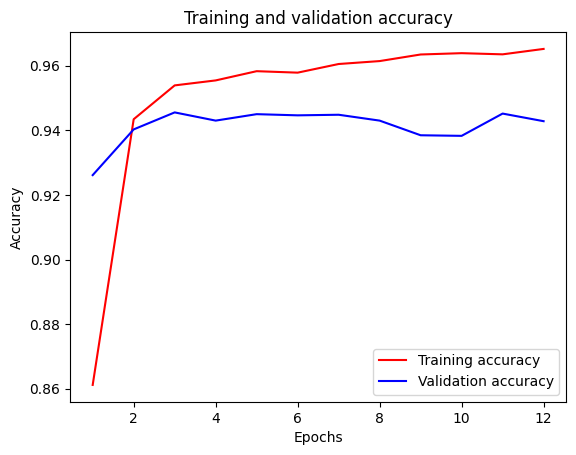

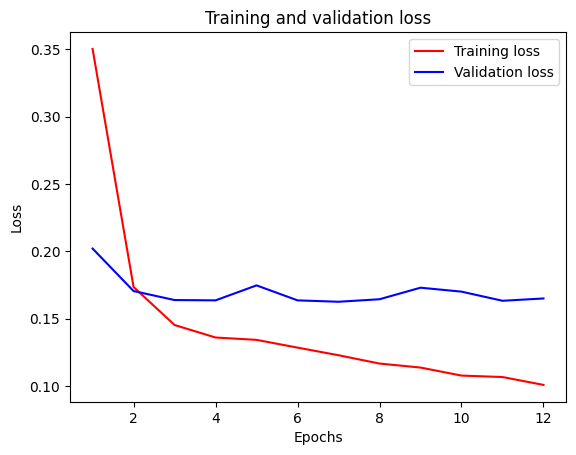

In [29]:
plotLearningCurve(history)

# Make some predictions

In [4]:
import tensorflow as tf
import numpy as np
import cv2


In [5]:
model = tf.keras.models.load_model('./model.h5')

In [6]:
# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    # Resize the image to match the input size of the model
    img = cv2.resize(img, target_size)
    # Reshape the image to add the batch dimension
    img = np.expand_dims(img, axis=0)
    # Normalize the pixel values
    img = img / 255.0
    return img

In [16]:
image_paths = [
  './cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',
  './cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'
]

def describe_result(result):
  if result[0][0] < 0.5:
    confidence = (1 - result[0][0]) * 100
    print('Infected')
    print(f'Confidence is {confidence}% with a score of {result[0][0]}')
  else:
    confidence = result[0][0] * 100
    print('Uninfected')
    print(f'Confidence is {confidence}% with a score of {result[0][0]}')

for image in image_paths:
  result = model.predict(preprocess_image(image))
  describe_result(result)

1/1 [==============================] - 0s 16ms/step
Infected
Confidence is 99.98872460637358% with a score of 0.00011275393626419827
1/1 [==============================] - 0s 12ms/step
Uninfected
Confidence is 55.61031103134155% with a score of 0.5561031103134155
